In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('./drive/My Drive/ERA5_Dataset')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import GradientBoostingClassifier
from datetime import datetime

import pickle
import metrics
import datashift

# Evaluate variable distribution over 4 geogrphical zones

## KDE for Wind Gust

In [5]:
def mean_n_zones(zones_n):
  new_att_list = []
  for i in range(zones_n):
    new_att_list.append('Mean_Z{}-0'.format(i+1))
  return new_att_list

In [6]:
df_wind = pd.read_csv('./csv/36_zones/wind_gust_10D.csv')
atts = ['DATE'] + mean_n_zones(36)
df_wind = df_wind[atts]
df_wind

,DATE,Mean_Z1-0,Mean_Z2-0,Mean_Z3-0,Mean_Z4-0,Mean_Z5-0,Mean_Z6-0,Mean_Z7-0,Mean_Z8-0,Mean_Z9-0,...,Mean_Z27-0,Mean_Z28-0,Mean_Z29-0,Mean_Z30-0,Mean_Z31-0,Mean_Z32-0,Mean_Z33-0,Mean_Z34-0,Mean_Z35-0,Mean_Z36-0
0,1980-01-12,3.548740,9.412391,9.483792,7.913419,6.782344,9.266021,3.426698,9.637839,9.303541,...,10.319242,12.085269,12.070151,10.582200,6.543351,11.859654,13.649060,13.034233,12.449431,11.319591
1,1980-01-13,4.107833,9.294527,7.848129,5.781929,4.519856,8.635076,3.017467,9.725628,8.242869,...,9.820364,11.625386,12.460661,10.363258,6.561680,9.107341,11.680472,13.833991,11.546332,11.174237
2,1980-01-14,3.763220,8.419221,6.536001,5.486318,6.757631,8.711023,3.032400,7.343130,7.320442,...,7.009375,12.273957,12.944783,11.432724,5.946938,8.507656,8.352167,12.579706,11.366022,10.611045
3,1980-01-15,3.793521,8.966829,7.559456,6.974781,7.776763,9.034895,3.397312,8.131960,8.348882,...,7.282163,11.987348,11.364119,11.001195,6.870468,9.536734,7.560960,10.855529,9.868039,8.887527
4,1980-01-16,4.022417,7.428180,5.745913,5.860072,7.151002,8.291923,3.811386,7.256756,8.317372,...,9.683074,10.548295,9.625702,10.422405,8.867028,13.942839,12.870493,9.784280,10.091712,8.000431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15411,2022-03-23,5.014873,4.613250,4.480374,7.290698,9.784600,5.896713,3.673720,7.693350,6.851555,...,8.243713,8.804151,11.101488,13.430420,8.040659,11.713286,9.020756,7.220425,9.801560,12.082103
15412,2022-03-24,4.135883,6.420239,6.445776,11.559761,10.422340,5.069840,3.482660,8.035005,5.540690,...,8.442447,8.831783,11.411475,11.964918,6.761475,11.063924,9.765960,7.846725,7.896013,9.319567
15413,2022-03-25,3.264814,5.741061,6.031738,11.951245,11.516801,4.054412,2.805589,6.399840,5.339819,...,7.304366,10.109534,13.486906,11.323813,7.345169,8.772989,7.585347,9.872298,10.573877,9.548143
15414,2022-03-26,4.252798,4.398173,5.591031,10.194236,8.717886,4.224939,3.165962,5.501085,5.037627,...,6.509865,9.972786,14.261005,13.287370,6.816436,5.313615,7.268482,8.702677,11.934969,11.314538


In [7]:
wind_zones = []
zones_flag = []
N_samples = len(df_wind)

for att in mean_n_zones(36):
  wind_zones.append(df_wind[att].values)

for i in range(36):
  zones_flag.append(np.full(N_samples, i+1))

wind_arr = np.concatenate(wind_zones)
flag_arr = np.concatenate(zones_flag)
# Create a DataFrame using the arrays
data = {'Wind': wind_arr, 'Zone': flag_arr}
df_kde = pd.DataFrame(data)

df_kde

,Wind,Zone
0,3.548740,1
1,4.107833,1
2,3.763220,1
3,3.793521,1
4,4.022417,1
...,...,...
554971,12.082103,36
554972,9.319567,36
554973,9.548143,36
554974,11.314538,36


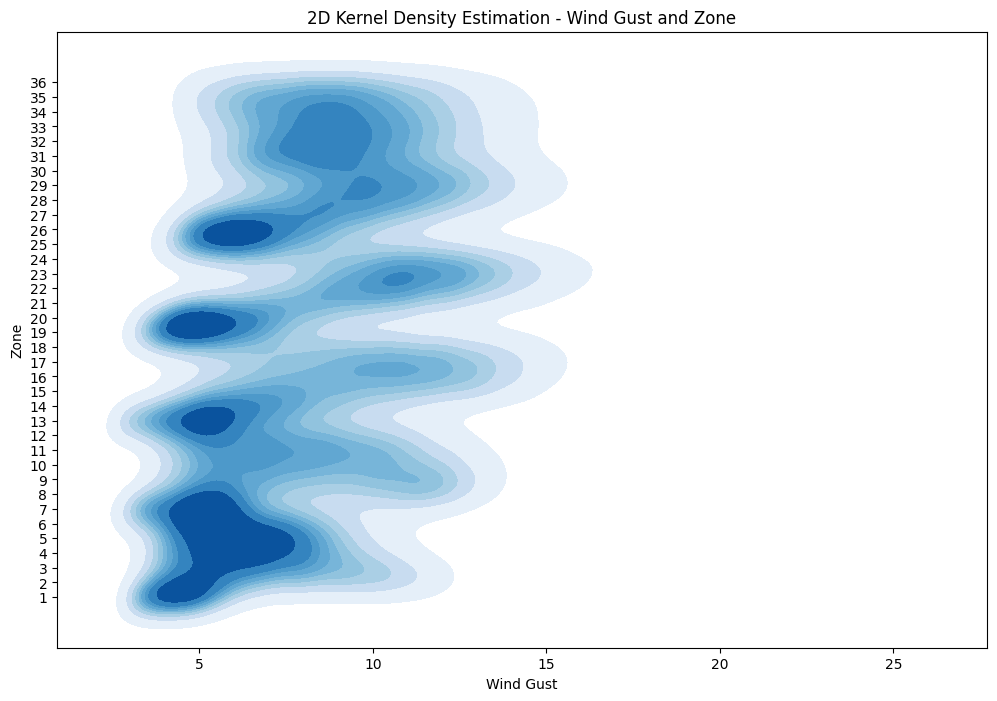

In [8]:
# Create a 2D KDE plot
plt.figure(figsize=(12, 8))
sns.kdeplot(x='Wind', y='Zone', data=df_kde, cmap="Blues", fill=True)

# Set custom y-axis tick values
custom_y_ticks = [
                     1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
                    13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                    25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36
                  ]

plt.yticks(custom_y_ticks)

plt.title('2D Kernel Density Estimation - Wind Gust and Zone')
plt.xlabel('Wind Gust')
plt.ylabel('Zone')

plt.show()

## KDE for pressure

In [9]:
def mean_n_zones(zones_n):
  new_att_list = []
  for i in range(zones_n):
    new_att_list.append('Mean_Z{}-0'.format(i+1))
  return new_att_list

In [10]:
df_press = pd.read_csv('./csv/36_zones/pressure_10D.csv')
atts = ['DATE'] + mean_n_zones(36)
df_press = df_press[atts]
df_press

,DATE,Mean_Z1-0,Mean_Z2-0,Mean_Z3-0,Mean_Z4-0,Mean_Z5-0,Mean_Z6-0,Mean_Z7-0,Mean_Z8-0,Mean_Z9-0,...,Mean_Z27-0,Mean_Z28-0,Mean_Z29-0,Mean_Z30-0,Mean_Z31-0,Mean_Z32-0,Mean_Z33-0,Mean_Z34-0,Mean_Z35-0,Mean_Z36-0
0,1980-01-12,101060.785148,100915.567676,100932.441176,100947.737961,100959.190681,100912.172487,101058.472410,100860.797625,100825.817375,...,100521.367435,100946.354098,101293.820514,101329.863022,101264.145444,100664.009661,100679.584700,101387.222399,101775.328269,101781.285921
1,1980-01-13,101086.364575,100930.370383,100991.437476,100961.799828,100951.872878,100918.823183,101133.882775,100909.052033,100930.272568,...,100730.655001,101083.437157,101412.383147,101473.445608,101147.175273,100878.238008,100853.500756,101521.919359,101927.195880,101923.615435
2,1980-01-14,101189.221933,101087.974636,101162.290692,101068.392321,100998.579841,100909.595389,101152.663672,101044.862938,101047.216432,...,100846.795040,101136.136971,101525.213028,101587.100621,101637.709078,101367.608775,101079.104942,101501.553040,101959.632563,102036.869553
3,1980-01-15,101245.205412,101101.986484,101094.173677,101096.165180,101052.757999,101048.102698,101256.704076,101069.003296,101046.571741,...,100887.912269,101218.077244,101558.211593,101724.311507,101791.733997,101502.242378,101204.311416,101511.149308,101939.694371,102178.484719
4,1980-01-16,101285.648124,101153.051227,101140.514944,101090.406308,101049.230167,101000.908140,101271.528087,101129.345667,101063.865217,...,100842.351671,101088.752156,101438.330492,101677.229771,101643.822160,101645.186201,101256.605705,101172.883083,101733.900735,102085.501328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15411,2022-03-23,101357.413204,101009.152594,100920.948997,100833.041809,100782.281441,100879.865298,101412.474107,101060.381845,100901.961539,...,101473.475620,101405.165938,101418.371551,101556.333651,101871.754090,101721.021173,101818.348820,101700.933294,101825.378920,102053.549090
15412,2022-03-24,101327.218861,101007.408223,100955.550212,100828.149194,100732.232643,100828.048230,101387.461194,101062.880765,100891.653147,...,101331.736888,101246.604467,101194.021179,101277.274176,101292.978895,101421.818057,101639.468456,101566.804514,101616.294765,101701.516295
15413,2022-03-25,101256.227041,100887.224413,100805.673734,100803.125721,100755.368170,100878.877698,101236.556359,100929.139171,100758.162759,...,101151.110114,101136.169206,101130.799927,101244.929936,100947.012498,100922.740053,101279.216031,101479.873996,101617.282551,101651.523814
15414,2022-03-26,101149.374449,100860.878397,100849.385106,100834.348235,100898.191947,101029.418134,101070.946818,100848.047927,100777.852152,...,101117.774753,101145.794744,101077.003767,101447.336534,101316.428803,101073.701762,101140.092190,101438.198034,101639.868053,101883.916341


In [11]:
press_zones = []
zones_flag = []
N_samples = len(df_press)

for att in mean_n_zones(36):
  press_zones.append(df_press[att].values)

for i in range(36):
  zones_flag.append(np.full(N_samples, i+1))

press_arr = np.concatenate(press_zones)
flag_arr = np.concatenate(zones_flag)
# Create a DataFrame using the arrays
data = {'Pressure': press_arr, 'Zone': flag_arr}
df_kde = pd.DataFrame(data)

df_kde

,Pressure,Zone
0,101060.785148,1
1,101086.364575,1
2,101189.221933,1
3,101245.205412,1
4,101285.648124,1
...,...,...
554971,102053.549090,36
554972,101701.516295,36
554973,101651.523814,36
554974,101883.916341,36


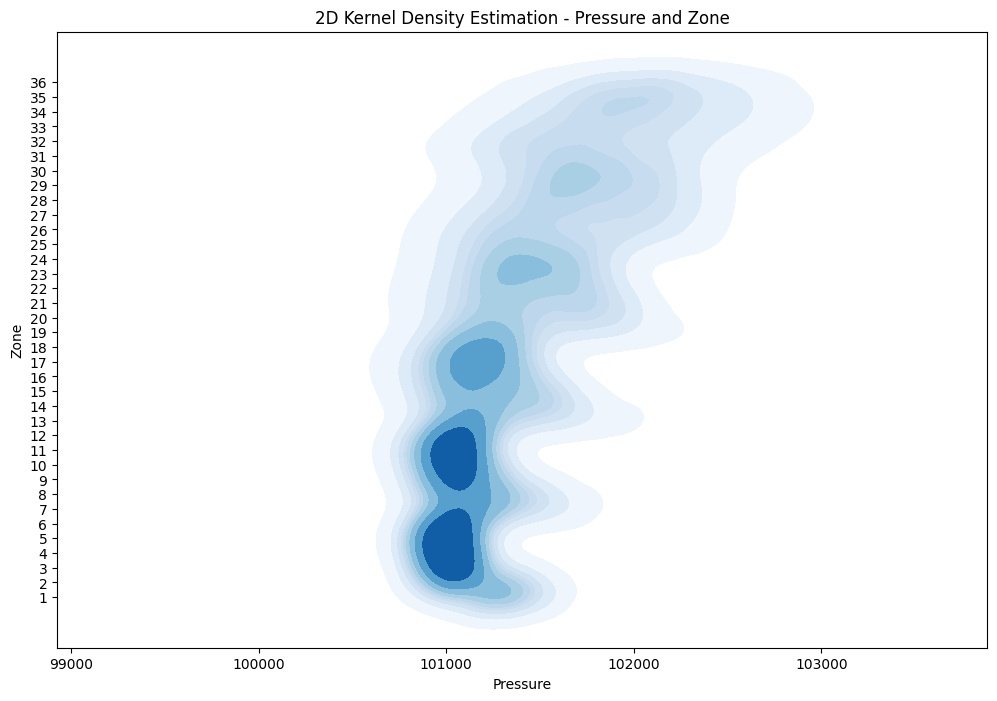

In [12]:
# Create a 2D KDE plot
plt.figure(figsize=(12, 8))
sns.kdeplot(x='Pressure', y='Zone', data=df_kde, cmap="Blues", fill=True)

# Set custom y-axis tick values
custom_y_ticks = [
                     1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
                    13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                    25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36
                  ]
plt.yticks(custom_y_ticks)

plt.title('2D Kernel Density Estimation - Pressure and Zone')
plt.xlabel('Pressure')
plt.ylabel('Zone')

plt.show()

## KDE for Sea Surface Temperature

In [13]:
def mean_n_zones(zones_n):
  new_att_list = []
  for i in range(zones_n):
    new_att_list.append('Mean_Z{}-0'.format(i+1))
  return new_att_list

In [14]:
df_temp = pd.read_csv('./csv/36_zones/temperature_1000hPa_10D.csv')
atts = ['DATE'] + mean_n_zones(36)
df_temp = df_temp[atts]
df_temp

,DATE,Mean_Z1-0,Mean_Z2-0,Mean_Z3-0,Mean_Z4-0,Mean_Z5-0,Mean_Z6-0,Mean_Z7-0,Mean_Z8-0,Mean_Z9-0,...,Mean_Z27-0,Mean_Z28-0,Mean_Z29-0,Mean_Z30-0,Mean_Z31-0,Mean_Z32-0,Mean_Z33-0,Mean_Z34-0,Mean_Z35-0,Mean_Z36-0
0,1980-01-12,301.513806,298.228728,298.487541,298.654115,298.644793,298.812240,299.668398,299.683429,298.882882,...,298.456239,297.570001,296.709754,295.482329,295.773716,296.183795,297.735195,296.186713,294.024899,292.574489
1,1980-01-13,301.304368,298.540659,298.760503,298.467268,298.491737,298.678009,299.529083,299.450146,298.998494,...,298.546271,297.685906,296.296732,294.965243,296.686074,295.869412,297.697466,296.377734,293.839782,291.944523
2,1980-01-14,301.052237,298.301295,298.700789,298.250554,298.368423,298.906908,300.248026,299.420969,299.137172,...,298.075145,297.683570,295.968494,294.852962,296.154676,294.923253,296.914161,296.269508,293.708126,292.290454
3,1980-01-15,301.231747,298.117178,298.782878,298.556964,298.685387,298.498169,299.660734,299.420027,298.860036,...,298.337954,297.764682,296.102089,295.260644,295.776325,294.792404,296.224733,296.291435,294.009508,292.594509
4,1980-01-16,300.905119,298.314793,298.453383,298.794147,298.380390,298.673581,299.398327,299.142458,298.711403,...,297.993120,298.019804,296.956412,296.243029,296.499512,294.565893,294.815459,296.623892,295.184446,293.669430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15411,2022-03-23,300.200863,299.654709,300.308422,299.831280,300.712414,300.215572,299.049266,299.626787,300.370468,...,298.456425,298.142023,297.667822,296.362500,295.728132,295.982524,295.926651,296.007593,295.088666,293.948309
15412,2022-03-24,301.458738,300.180462,300.328919,299.696171,300.420222,300.264895,300.305450,300.143248,299.908208,...,298.285407,298.095886,297.307692,296.307967,296.957007,296.860980,295.729541,295.979597,294.865853,293.991731
15413,2022-03-25,301.735481,300.174554,300.537860,299.919791,300.567972,300.131298,301.058472,300.649871,300.369454,...,298.376050,297.871703,297.017252,296.484637,297.970890,297.556727,296.728524,296.184043,294.632421,293.626139
15414,2022-03-26,301.657267,300.310561,300.505604,299.788138,300.154520,300.535438,301.859249,300.763739,300.461667,...,298.404641,297.776680,297.556103,296.664267,296.187255,296.633020,297.132987,296.110167,295.008361,293.925998


In [15]:
sst_zones = []
zones_flag = []
N_samples = len(df_temp)

for att in mean_n_zones(36):
  sst_zones.append(df_temp[att].values - 273.15)

for i in range(36):
  zones_flag.append(np.full(N_samples, i+1))

sst_arr = np.concatenate(sst_zones)
flag_arr = np.concatenate(zones_flag)
# Create a DataFrame using the arrays
data = {'SST': sst_arr, 'Zone': flag_arr}
df_kde = pd.DataFrame(data)

df_kde

,SST,Zone
0,28.363806,1
1,28.154368,1
2,27.902237,1
3,28.081747,1
4,27.755119,1
...,...,...
554971,20.798309,36
554972,20.841731,36
554973,20.476139,36
554974,20.775998,36


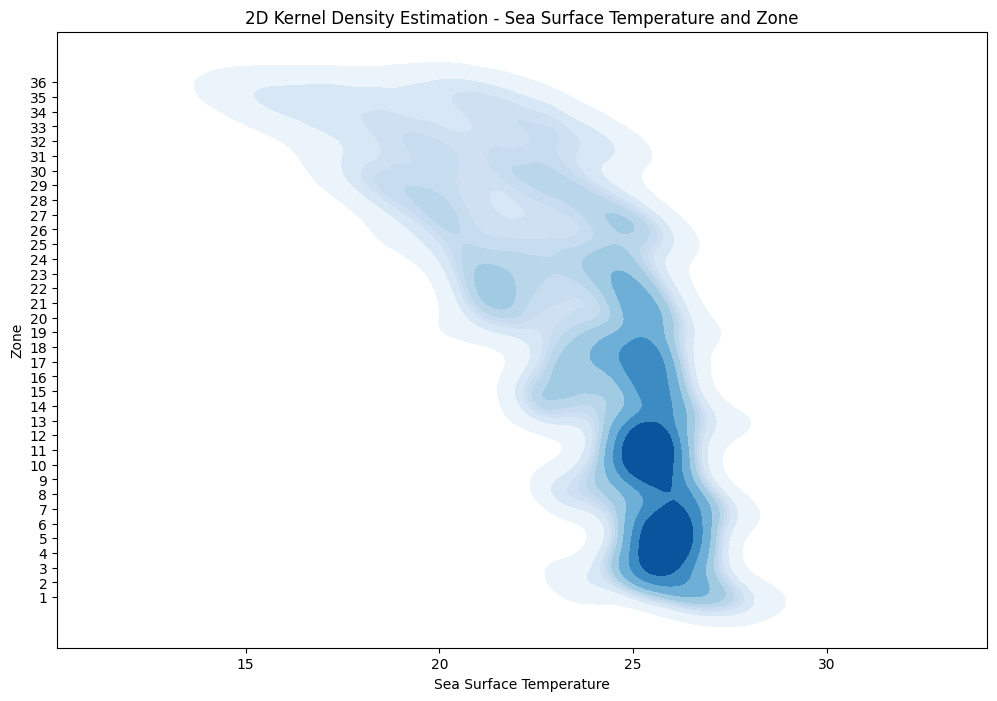

In [16]:
# Create a 2D KDE plot
plt.figure(figsize=(12, 8))
sns.kdeplot(x='SST', y='Zone', data=df_kde, cmap="Blues", fill=True)

# Set custom y-axis tick values
custom_y_ticks = [
                     1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
                    13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                    25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36
                  ]
plt.yticks(custom_y_ticks)

plt.title('2D Kernel Density Estimation - Sea Surface Temperature and Zone')
plt.xlabel('Sea Surface Temperature')
plt.ylabel('Zone')

plt.show()

# Evaluate variables distribution over weeks of the year

## Wind Gust

In [18]:
df_wind = pd.read_csv('./csv/36_zones/wind_gust_10D.csv')
atts = ['DATE'] + mean_n_zones(36)
df_wind = df_wind[atts]
df_wind = df_wind.set_index('DATE')
df_wind

,Mean_Z1-0,Mean_Z2-0,Mean_Z3-0,Mean_Z4-0,Mean_Z5-0,Mean_Z6-0,Mean_Z7-0,Mean_Z8-0,Mean_Z9-0,Mean_Z10-0,...,Mean_Z27-0,Mean_Z28-0,Mean_Z29-0,Mean_Z30-0,Mean_Z31-0,Mean_Z32-0,Mean_Z33-0,Mean_Z34-0,Mean_Z35-0,Mean_Z36-0
DATE,,,,,,,,,,,,,,,,,,,,,
1980-01-12,3.548740,9.412391,9.483792,7.913419,6.782344,9.266021,3.426698,9.637839,9.303541,10.870209,...,10.319242,12.085269,12.070151,10.582200,6.543351,11.859654,13.649060,13.034233,12.449431,11.319591
1980-01-13,4.107833,9.294527,7.848129,5.781929,4.519856,8.635076,3.017467,9.725628,8.242869,8.053233,...,9.820364,11.625386,12.460661,10.363258,6.561680,9.107341,11.680472,13.833991,11.546332,11.174237
1980-01-14,3.763220,8.419221,6.536001,5.486318,6.757631,8.711023,3.032400,7.343130,7.320442,8.000793,...,7.009375,12.273957,12.944783,11.432724,5.946938,8.507656,8.352167,12.579706,11.366022,10.611045
1980-01-15,3.793521,8.966829,7.559456,6.974781,7.776763,9.034895,3.397312,8.131960,8.348882,7.862389,...,7.282163,11.987348,11.364119,11.001195,6.870468,9.536734,7.560960,10.855529,9.868039,8.887527
1980-01-16,4.022417,7.428180,5.745913,5.860072,7.151002,8.291923,3.811386,7.256756,8.317372,7.391098,...,9.683074,10.548295,9.625702,10.422405,8.867028,13.942839,12.870493,9.784280,10.091712,8.000431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-23,5.014873,4.613250,4.480374,7.290698,9.784600,5.896713,3.673720,7.693350,6.851555,4.899182,...,8.243713,8.804151,11.101488,13.430420,8.040659,11.713286,9.020756,7.220425,9.801560,12.082103
2022-03-24,4.135883,6.420239,6.445776,11.559761,10.422340,5.069840,3.482660,8.035005,5.540690,6.604139,...,8.442447,8.831783,11.411475,11.964918,6.761475,11.063924,9.765960,7.846725,7.896013,9.319567
2022-03-25,3.264814,5.741061,6.031738,11.951245,11.516801,4.054412,2.805589,6.399840,5.339819,8.778596,...,7.304366,10.109534,13.486906,11.323813,7.345169,8.772989,7.585347,9.872298,10.573877,9.548143


In [19]:
dates = df_wind.index

def get_week_number(date_str):
    # Convert the date string to a datetime object
    date_object = datetime.strptime(date_str, '%Y-%m-%d')
    # Use strftime to get the ISO week number
    week_number = date_object.strftime('%V')
    return int(week_number)

week_number_list = []
for elem in dates:
  week_number_list.append(get_week_number(elem))

week_number_arr = np.array(week_number_list)
print(week_number_arr.shape)
print(week_number_arr)

(15416,)
[ 2  2  3 ... 12 12 12]


In [20]:
df_wind['WEEK'] = week_number_arr
df_wind

,Mean_Z1-0,Mean_Z2-0,Mean_Z3-0,Mean_Z4-0,Mean_Z5-0,Mean_Z6-0,Mean_Z7-0,Mean_Z8-0,Mean_Z9-0,Mean_Z10-0,...,Mean_Z28-0,Mean_Z29-0,Mean_Z30-0,Mean_Z31-0,Mean_Z32-0,Mean_Z33-0,Mean_Z34-0,Mean_Z35-0,Mean_Z36-0,WEEK
DATE,,,,,,,,,,,,,,,,,,,,,
1980-01-12,3.548740,9.412391,9.483792,7.913419,6.782344,9.266021,3.426698,9.637839,9.303541,10.870209,...,12.085269,12.070151,10.582200,6.543351,11.859654,13.649060,13.034233,12.449431,11.319591,2
1980-01-13,4.107833,9.294527,7.848129,5.781929,4.519856,8.635076,3.017467,9.725628,8.242869,8.053233,...,11.625386,12.460661,10.363258,6.561680,9.107341,11.680472,13.833991,11.546332,11.174237,2
1980-01-14,3.763220,8.419221,6.536001,5.486318,6.757631,8.711023,3.032400,7.343130,7.320442,8.000793,...,12.273957,12.944783,11.432724,5.946938,8.507656,8.352167,12.579706,11.366022,10.611045,3
1980-01-15,3.793521,8.966829,7.559456,6.974781,7.776763,9.034895,3.397312,8.131960,8.348882,7.862389,...,11.987348,11.364119,11.001195,6.870468,9.536734,7.560960,10.855529,9.868039,8.887527,3
1980-01-16,4.022417,7.428180,5.745913,5.860072,7.151002,8.291923,3.811386,7.256756,8.317372,7.391098,...,10.548295,9.625702,10.422405,8.867028,13.942839,12.870493,9.784280,10.091712,8.000431,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-23,5.014873,4.613250,4.480374,7.290698,9.784600,5.896713,3.673720,7.693350,6.851555,4.899182,...,8.804151,11.101488,13.430420,8.040659,11.713286,9.020756,7.220425,9.801560,12.082103,12
2022-03-24,4.135883,6.420239,6.445776,11.559761,10.422340,5.069840,3.482660,8.035005,5.540690,6.604139,...,8.831783,11.411475,11.964918,6.761475,11.063924,9.765960,7.846725,7.896013,9.319567,12
2022-03-25,3.264814,5.741061,6.031738,11.951245,11.516801,4.054412,2.805589,6.399840,5.339819,8.778596,...,10.109534,13.486906,11.323813,7.345169,8.772989,7.585347,9.872298,10.573877,9.548143,12


In [22]:
wind_zones_arr = []
zones_flag = []

for i in range(36):
  wind_zones_arr.append(df_wind['Mean_Z{}-0'.format(i+1)].values)

for i in range(36):
  zones_flag.append(df_wind['WEEK'].values)

wind_arr = np.concatenate(wind_zones_arr)
flag_arr = np.concatenate(zones_flag)
# Create a DataFrame using the arrays
data = {'Wind': wind_arr, 'Week': flag_arr}
df_kde = pd.DataFrame(data)

df_kde

,Wind,Week
0,3.548740,2
1,4.107833,2
2,3.763220,3
3,3.793521,3
4,4.022417,3
...,...,...
554971,12.082103,12
554972,9.319567,12
554973,9.548143,12
554974,11.314538,12


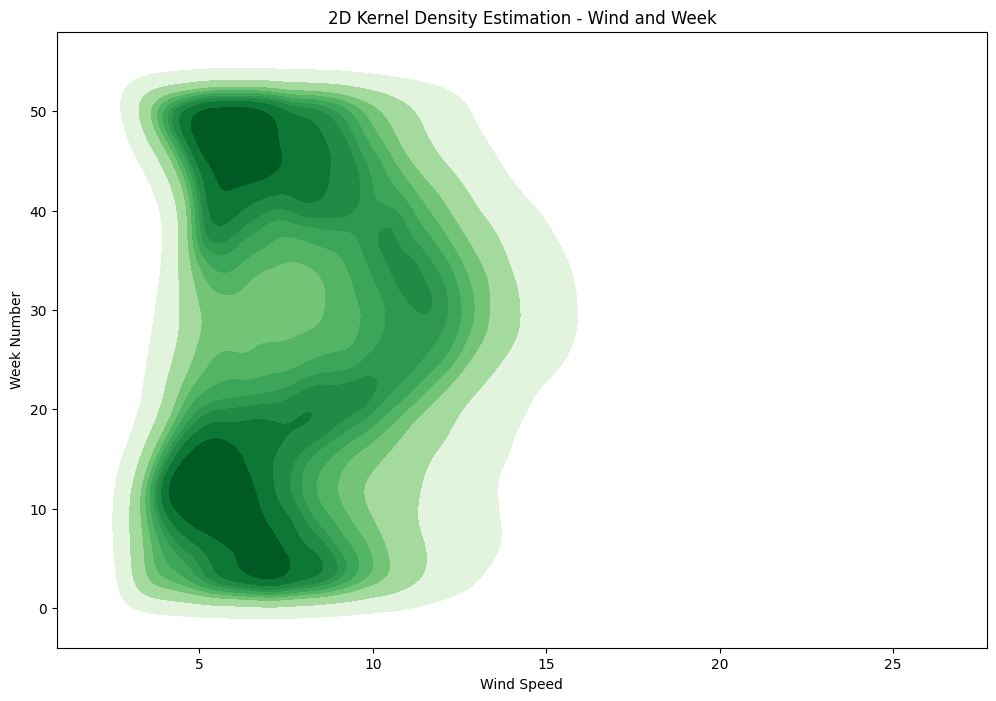

In [23]:
# Create a 2D KDE plot
plt.figure(figsize=(12, 8))
sns.kdeplot(x='Wind', y='Week', data=df_kde, cmap="Greens", fill=True)

plt.title('2D Kernel Density Estimation - Wind and Week')
plt.xlabel('Wind Speed')
plt.ylabel('Week Number')

plt.show()

## Pressure

In [27]:
df_press = pd.read_csv('./csv/36_zones/pressure_10D.csv')
atts = ['DATE'] + mean_n_zones(36)
df_press = df_press[atts]
df_press = df_press.set_index('DATE')
df_press

,Mean_Z1-0,Mean_Z2-0,Mean_Z3-0,Mean_Z4-0,Mean_Z5-0,Mean_Z6-0,Mean_Z7-0,Mean_Z8-0,Mean_Z9-0,Mean_Z10-0,...,Mean_Z27-0,Mean_Z28-0,Mean_Z29-0,Mean_Z30-0,Mean_Z31-0,Mean_Z32-0,Mean_Z33-0,Mean_Z34-0,Mean_Z35-0,Mean_Z36-0
DATE,,,,,,,,,,,,,,,,,,,,,
1980-01-12,101060.785148,100915.567676,100932.441176,100947.737961,100959.190681,100912.172487,101058.472410,100860.797625,100825.817375,100825.434821,...,100521.367435,100946.354098,101293.820514,101329.863022,101264.145444,100664.009661,100679.584700,101387.222399,101775.328269,101781.285921
1980-01-13,101086.364575,100930.370383,100991.437476,100961.799828,100951.872878,100918.823183,101133.882775,100909.052033,100930.272568,100919.102364,...,100730.655001,101083.437157,101412.383147,101473.445608,101147.175273,100878.238008,100853.500756,101521.919359,101927.195880,101923.615435
1980-01-14,101189.221933,101087.974636,101162.290692,101068.392321,100998.579841,100909.595389,101152.663672,101044.862938,101047.216432,100981.409005,...,100846.795040,101136.136971,101525.213028,101587.100621,101637.709078,101367.608775,101079.104942,101501.553040,101959.632563,102036.869553
1980-01-15,101245.205412,101101.986484,101094.173677,101096.165180,101052.757999,101048.102698,101256.704076,101069.003296,101046.571741,101081.964186,...,100887.912269,101218.077244,101558.211593,101724.311507,101791.733997,101502.242378,101204.311416,101511.149308,101939.694371,102178.484719
1980-01-16,101285.648124,101153.051227,101140.514944,101090.406308,101049.230167,101000.908140,101271.528087,101129.345667,101063.865217,101050.368195,...,100842.351671,101088.752156,101438.330492,101677.229771,101643.822160,101645.186201,101256.605705,101172.883083,101733.900735,102085.501328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-23,101357.413204,101009.152594,100920.948997,100833.041809,100782.281441,100879.865298,101412.474107,101060.381845,100901.961539,100819.279130,...,101473.475620,101405.165938,101418.371551,101556.333651,101871.754090,101721.021173,101818.348820,101700.933294,101825.378920,102053.549090
2022-03-24,101327.218861,101007.408223,100955.550212,100828.149194,100732.232643,100828.048230,101387.461194,101062.880765,100891.653147,100763.809552,...,101331.736888,101246.604467,101194.021179,101277.274176,101292.978895,101421.818057,101639.468456,101566.804514,101616.294765,101701.516295
2022-03-25,101256.227041,100887.224413,100805.673734,100803.125721,100755.368170,100878.877698,101236.556359,100929.139171,100758.162759,100682.239976,...,101151.110114,101136.169206,101130.799927,101244.929936,100947.012498,100922.740053,101279.216031,101479.873996,101617.282551,101651.523814


In [28]:
dates = df_press.index

def get_week_number(date_str):
    # Convert the date string to a datetime object
    date_object = datetime.strptime(date_str, '%Y-%m-%d')
    # Use strftime to get the ISO week number
    week_number = date_object.strftime('%V')
    return int(week_number)

week_number_list = []
for elem in dates:
  week_number_list.append(get_week_number(elem))

week_number_arr = np.array(week_number_list)
print(week_number_arr.shape)
print(week_number_arr)

(15416,)
[ 2  2  3 ... 12 12 12]


In [29]:
df_press['WEEK'] = week_number_arr
df_press

,Mean_Z1-0,Mean_Z2-0,Mean_Z3-0,Mean_Z4-0,Mean_Z5-0,Mean_Z6-0,Mean_Z7-0,Mean_Z8-0,Mean_Z9-0,Mean_Z10-0,...,Mean_Z28-0,Mean_Z29-0,Mean_Z30-0,Mean_Z31-0,Mean_Z32-0,Mean_Z33-0,Mean_Z34-0,Mean_Z35-0,Mean_Z36-0,WEEK
DATE,,,,,,,,,,,,,,,,,,,,,
1980-01-12,101060.785148,100915.567676,100932.441176,100947.737961,100959.190681,100912.172487,101058.472410,100860.797625,100825.817375,100825.434821,...,100946.354098,101293.820514,101329.863022,101264.145444,100664.009661,100679.584700,101387.222399,101775.328269,101781.285921,2
1980-01-13,101086.364575,100930.370383,100991.437476,100961.799828,100951.872878,100918.823183,101133.882775,100909.052033,100930.272568,100919.102364,...,101083.437157,101412.383147,101473.445608,101147.175273,100878.238008,100853.500756,101521.919359,101927.195880,101923.615435,2
1980-01-14,101189.221933,101087.974636,101162.290692,101068.392321,100998.579841,100909.595389,101152.663672,101044.862938,101047.216432,100981.409005,...,101136.136971,101525.213028,101587.100621,101637.709078,101367.608775,101079.104942,101501.553040,101959.632563,102036.869553,3
1980-01-15,101245.205412,101101.986484,101094.173677,101096.165180,101052.757999,101048.102698,101256.704076,101069.003296,101046.571741,101081.964186,...,101218.077244,101558.211593,101724.311507,101791.733997,101502.242378,101204.311416,101511.149308,101939.694371,102178.484719,3
1980-01-16,101285.648124,101153.051227,101140.514944,101090.406308,101049.230167,101000.908140,101271.528087,101129.345667,101063.865217,101050.368195,...,101088.752156,101438.330492,101677.229771,101643.822160,101645.186201,101256.605705,101172.883083,101733.900735,102085.501328,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-23,101357.413204,101009.152594,100920.948997,100833.041809,100782.281441,100879.865298,101412.474107,101060.381845,100901.961539,100819.279130,...,101405.165938,101418.371551,101556.333651,101871.754090,101721.021173,101818.348820,101700.933294,101825.378920,102053.549090,12
2022-03-24,101327.218861,101007.408223,100955.550212,100828.149194,100732.232643,100828.048230,101387.461194,101062.880765,100891.653147,100763.809552,...,101246.604467,101194.021179,101277.274176,101292.978895,101421.818057,101639.468456,101566.804514,101616.294765,101701.516295,12
2022-03-25,101256.227041,100887.224413,100805.673734,100803.125721,100755.368170,100878.877698,101236.556359,100929.139171,100758.162759,100682.239976,...,101136.169206,101130.799927,101244.929936,100947.012498,100922.740053,101279.216031,101479.873996,101617.282551,101651.523814,12


In [31]:
press_zones_arr = []
zones_flag = []

for i in range(36):
  press_zones_arr.append(df_press['Mean_Z{}-0'.format(i+1)].values)

for i in range(36):
  zones_flag.append(df_wind['WEEK'].values)

press_arr = np.concatenate(press_zones_arr)
flag_arr = np.concatenate(zones_flag)
# Create a DataFrame using the arrays
data = {'Pressure': press_arr, 'Week': flag_arr}
df_kde = pd.DataFrame(data)

df_kde

,Pressure,Week
0,101060.785148,2
1,101086.364575,2
2,101189.221933,3
3,101245.205412,3
4,101285.648124,3
...,...,...
554971,102053.549090,12
554972,101701.516295,12
554973,101651.523814,12
554974,101883.916341,12


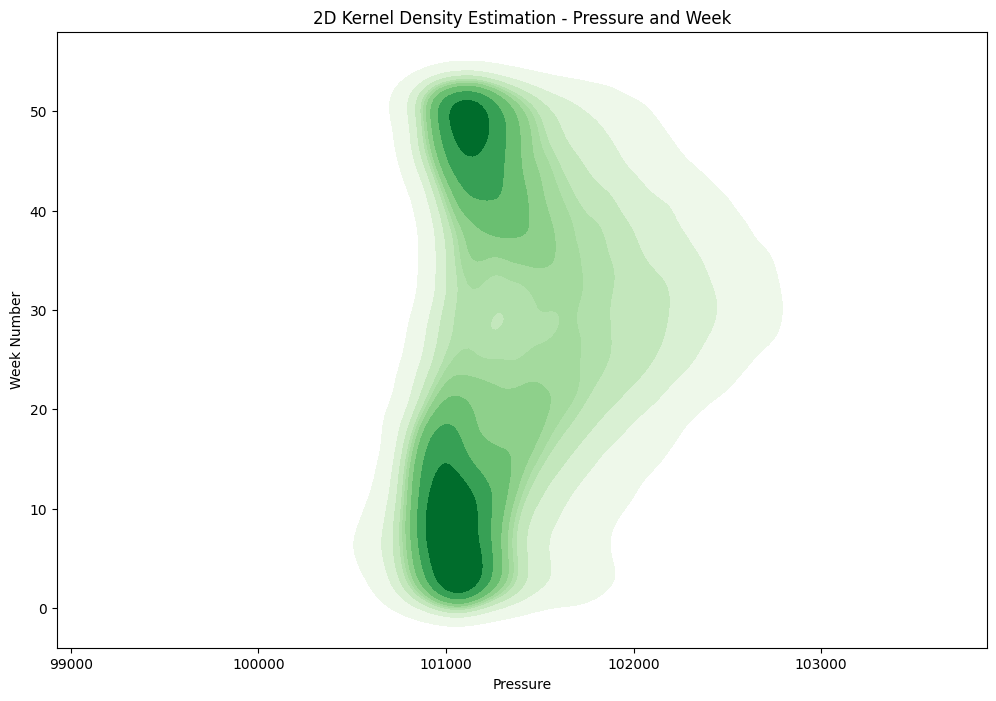

In [32]:
# Create a 2D KDE plot
plt.figure(figsize=(12, 8))
sns.kdeplot(x='Pressure', y='Week', data=df_kde, cmap="Greens", fill=True)

plt.title('2D Kernel Density Estimation - Pressure and Week')
plt.xlabel('Pressure')
plt.ylabel('Week Number')

plt.show()

## Sea Surface Temperature

In [33]:
df_temp = pd.read_csv('./csv/36_zones/temperature_1000hPa_10D.csv')
atts = ['DATE'] + mean_n_zones(36)
df_temp = df_temp[atts]
df_temp = df_temp.set_index('DATE')
df_temp

,Mean_Z1-0,Mean_Z2-0,Mean_Z3-0,Mean_Z4-0,Mean_Z5-0,Mean_Z6-0,Mean_Z7-0,Mean_Z8-0,Mean_Z9-0,Mean_Z10-0,...,Mean_Z27-0,Mean_Z28-0,Mean_Z29-0,Mean_Z30-0,Mean_Z31-0,Mean_Z32-0,Mean_Z33-0,Mean_Z34-0,Mean_Z35-0,Mean_Z36-0
DATE,,,,,,,,,,,,,,,,,,,,,
1980-01-12,301.513806,298.228728,298.487541,298.654115,298.644793,298.812240,299.668398,299.683429,298.882882,298.865468,...,298.456239,297.570001,296.709754,295.482329,295.773716,296.183795,297.735195,296.186713,294.024899,292.574489
1980-01-13,301.304368,298.540659,298.760503,298.467268,298.491737,298.678009,299.529083,299.450146,298.998494,298.424927,...,298.546271,297.685906,296.296732,294.965243,296.686074,295.869412,297.697466,296.377734,293.839782,291.944523
1980-01-14,301.052237,298.301295,298.700789,298.250554,298.368423,298.906908,300.248026,299.420969,299.137172,298.051127,...,298.075145,297.683570,295.968494,294.852962,296.154676,294.923253,296.914161,296.269508,293.708126,292.290454
1980-01-15,301.231747,298.117178,298.782878,298.556964,298.685387,298.498169,299.660734,299.420027,298.860036,297.785497,...,298.337954,297.764682,296.102089,295.260644,295.776325,294.792404,296.224733,296.291435,294.009508,292.594509
1980-01-16,300.905119,298.314793,298.453383,298.794147,298.380390,298.673581,299.398327,299.142458,298.711403,298.336710,...,297.993120,298.019804,296.956412,296.243029,296.499512,294.565893,294.815459,296.623892,295.184446,293.669430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-23,300.200863,299.654709,300.308422,299.831280,300.712414,300.215572,299.049266,299.626787,300.370468,299.699936,...,298.456425,298.142023,297.667822,296.362500,295.728132,295.982524,295.926651,296.007593,295.088666,293.948309
2022-03-24,301.458738,300.180462,300.328919,299.696171,300.420222,300.264895,300.305450,300.143248,299.908208,299.379142,...,298.285407,298.095886,297.307692,296.307967,296.957007,296.860980,295.729541,295.979597,294.865853,293.991731
2022-03-25,301.735481,300.174554,300.537860,299.919791,300.567972,300.131298,301.058472,300.649871,300.369454,300.215681,...,298.376050,297.871703,297.017252,296.484637,297.970890,297.556727,296.728524,296.184043,294.632421,293.626139


In [34]:
dates = df_temp.index

def get_week_number(date_str):
    # Convert the date string to a datetime object
    date_object = datetime.strptime(date_str, '%Y-%m-%d')
    # Use strftime to get the ISO week number
    week_number = date_object.strftime('%V')
    return int(week_number)

week_number_list = []
for elem in dates:
  week_number_list.append(get_week_number(elem))

week_number_arr = np.array(week_number_list)
print(week_number_arr.shape)
print(week_number_arr)

(15416,)
[ 2  2  3 ... 12 12 12]


In [35]:
df_temp['WEEK'] = week_number_arr
df_temp

,Mean_Z1-0,Mean_Z2-0,Mean_Z3-0,Mean_Z4-0,Mean_Z5-0,Mean_Z6-0,Mean_Z7-0,Mean_Z8-0,Mean_Z9-0,Mean_Z10-0,...,Mean_Z28-0,Mean_Z29-0,Mean_Z30-0,Mean_Z31-0,Mean_Z32-0,Mean_Z33-0,Mean_Z34-0,Mean_Z35-0,Mean_Z36-0,WEEK
DATE,,,,,,,,,,,,,,,,,,,,,
1980-01-12,301.513806,298.228728,298.487541,298.654115,298.644793,298.812240,299.668398,299.683429,298.882882,298.865468,...,297.570001,296.709754,295.482329,295.773716,296.183795,297.735195,296.186713,294.024899,292.574489,2
1980-01-13,301.304368,298.540659,298.760503,298.467268,298.491737,298.678009,299.529083,299.450146,298.998494,298.424927,...,297.685906,296.296732,294.965243,296.686074,295.869412,297.697466,296.377734,293.839782,291.944523,2
1980-01-14,301.052237,298.301295,298.700789,298.250554,298.368423,298.906908,300.248026,299.420969,299.137172,298.051127,...,297.683570,295.968494,294.852962,296.154676,294.923253,296.914161,296.269508,293.708126,292.290454,3
1980-01-15,301.231747,298.117178,298.782878,298.556964,298.685387,298.498169,299.660734,299.420027,298.860036,297.785497,...,297.764682,296.102089,295.260644,295.776325,294.792404,296.224733,296.291435,294.009508,292.594509,3
1980-01-16,300.905119,298.314793,298.453383,298.794147,298.380390,298.673581,299.398327,299.142458,298.711403,298.336710,...,298.019804,296.956412,296.243029,296.499512,294.565893,294.815459,296.623892,295.184446,293.669430,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-23,300.200863,299.654709,300.308422,299.831280,300.712414,300.215572,299.049266,299.626787,300.370468,299.699936,...,298.142023,297.667822,296.362500,295.728132,295.982524,295.926651,296.007593,295.088666,293.948309,12
2022-03-24,301.458738,300.180462,300.328919,299.696171,300.420222,300.264895,300.305450,300.143248,299.908208,299.379142,...,298.095886,297.307692,296.307967,296.957007,296.860980,295.729541,295.979597,294.865853,293.991731,12
2022-03-25,301.735481,300.174554,300.537860,299.919791,300.567972,300.131298,301.058472,300.649871,300.369454,300.215681,...,297.871703,297.017252,296.484637,297.970890,297.556727,296.728524,296.184043,294.632421,293.626139,12


In [36]:
press_zones_arr = []
zones_flag = []

for i in range(36):
  press_zones_arr.append(df_temp['Mean_Z{}-0'.format(i+1)].values)

for i in range(36):
  zones_flag.append(df_temp['WEEK'].values)

temp_arr = np.concatenate(press_zones_arr)
flag_arr = np.concatenate(zones_flag)
# Create a DataFrame using the arrays
data = {'Temperature': temp_arr, 'Week': flag_arr}
df_kde = pd.DataFrame(data)

df_kde

,Temperature,Week
0,301.513806,2
1,301.304368,2
2,301.052237,3
3,301.231747,3
4,300.905119,3
...,...,...
554971,293.948309,12
554972,293.991731,12
554973,293.626139,12
554974,293.925998,12


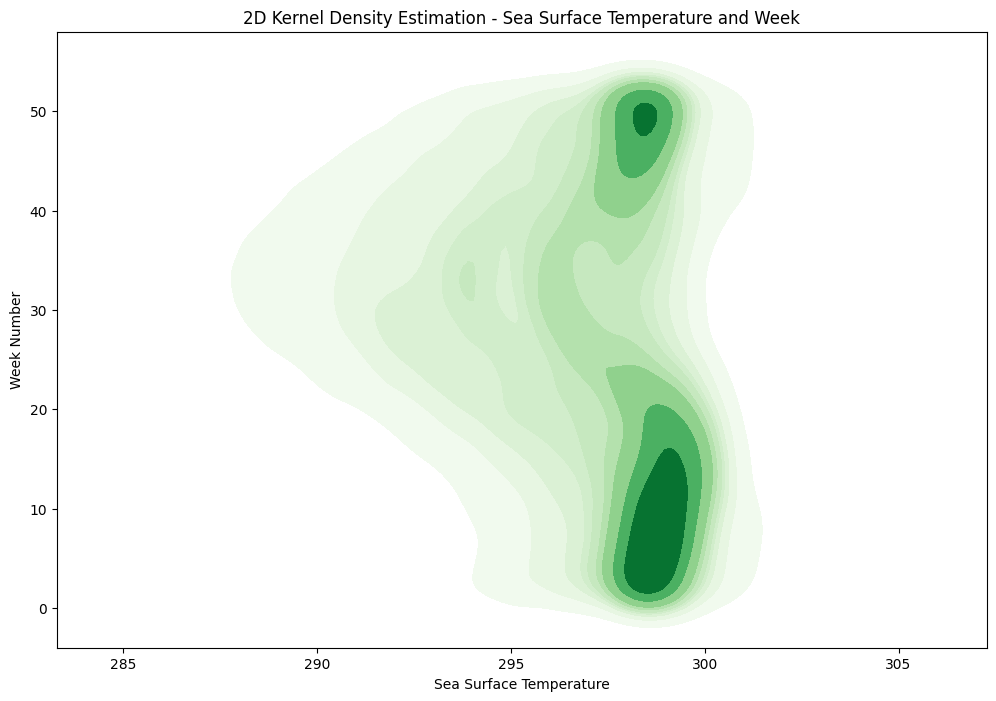

In [37]:
# Create a 2D KDE plot
plt.figure(figsize=(12, 8))
sns.kdeplot(x='Temperature', y='Week', data=df_kde, cmap="Greens", fill=True)

plt.title('2D Kernel Density Estimation - Sea Surface Temperature and Week')
plt.xlabel('Sea Surface Temperature')
plt.ylabel('Week Number')

plt.show()